In [13]:
import os, glob
import numpy as np
from utils import *

In [2]:
mylist = [f for f in glob.glob("/Volumes/Backup Plus/twins_partly_cloudy_extracted/*.npy")]
print(len(mylist)) #[-84:65]
mylist[:3]

289


['/Volumes/Backup Plus/twins_partly_cloudy_extracted/sub-0001_LTR_Z_THP001_LP012_voxelwise.npy',
 '/Volumes/Backup Plus/twins_partly_cloudy_extracted/sub-0422_LTR_Z_THP001_LP012_voxelwise.npy',
 '/Volumes/Backup Plus/twins_partly_cloudy_extracted/sub-0004_LTR_Z_THP001_LP012_voxelwise.npy']

In [3]:
data0 = np.load(mylist[0])
print(data0.shape)

data1 = np.load(mylist[1])
print(data1.shape)

(380, 124045)
(380, 124045)


In [11]:
ts_data = np.stack((data0, data1))
#ts_data.shape

ts_data = np.swapaxes(ts_data, 1, 2)
ts_data = np.swapaxes(ts_data, 0, 2)
ts_data.shape

(380, 124045, 2)

In [15]:
curr_isc = partly_isc(ts_data, pairwise=True, verbose = False)
curr_isc.shape

(1, 124045)

### map back into brain space

In [16]:
from nilearn.maskers import NiftiMasker

#mask_path = '/Volumes/Backup Plus/twins_fmriprep/sub-0001/ses-02/anat/sub-0001_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'

brain_masker = NiftiMasker( #mask_img = mask_path,
                            detrend     = True, 
                            standardize = True,
                            high_pass   = 0.01, 
                            t_r         = 0.8, 
                            low_pass    = 0.12,
                            mask_strategy = 'whole-brain-template',
                          );


brain_masker.fit('/Volumes/Backup Plus/twins_fmriprep/sub-0001/ses-02/func/sub-0001_ses-02_task-partlycloudy_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')

NiftiMasker(detrend=True, high_pass=0.01, low_pass=0.12,
            mask_strategy='whole-brain-template', standardize=True, t_r=0.8)

In [17]:
r = brain_masker.inverse_transform(curr_isc)

/opt/anaconda3/envs/neuroimaging/lib/python3.9/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(
/opt/anaconda3/envs/neuroimaging/lib/python3.9/site-packages/nilearn/plotting/html_stat_map.py:217: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  bg_img = load_mni152_template()



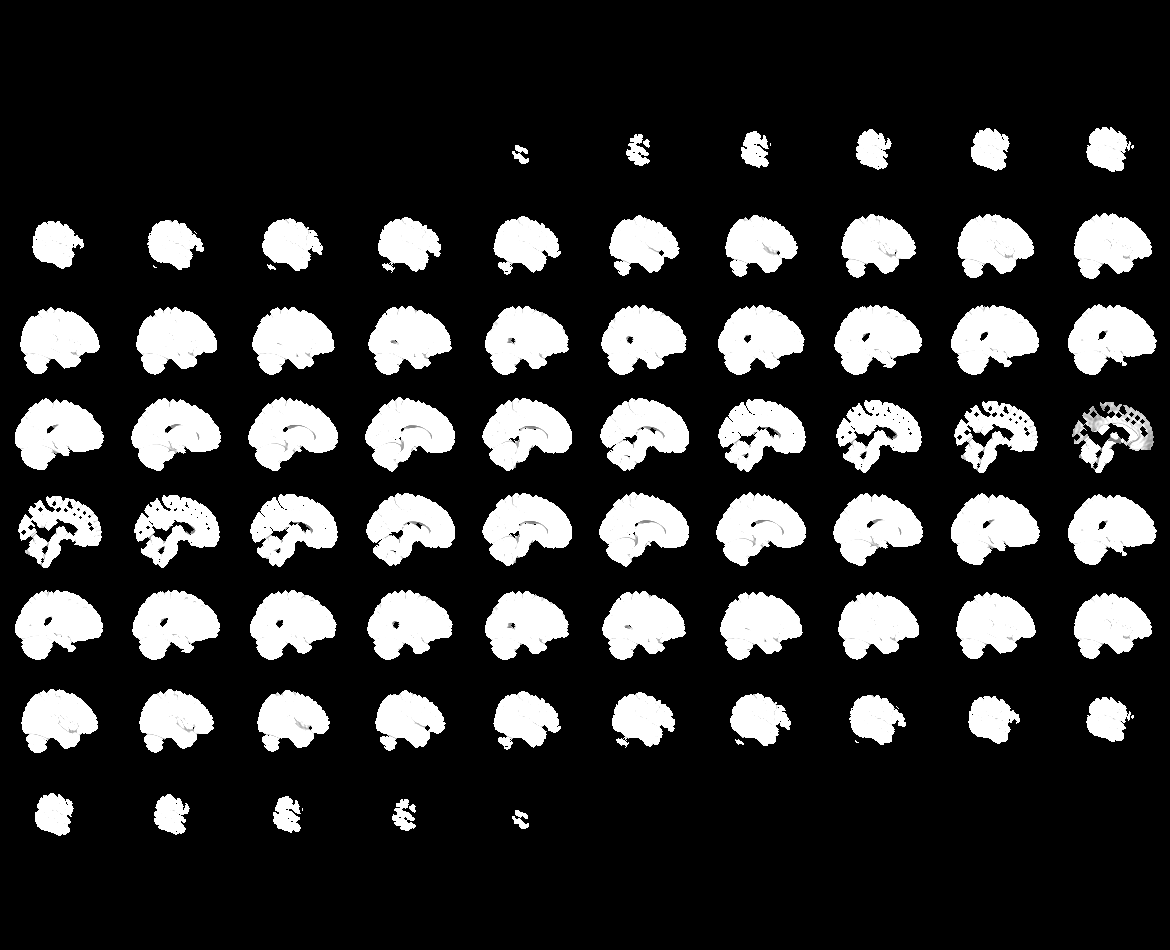
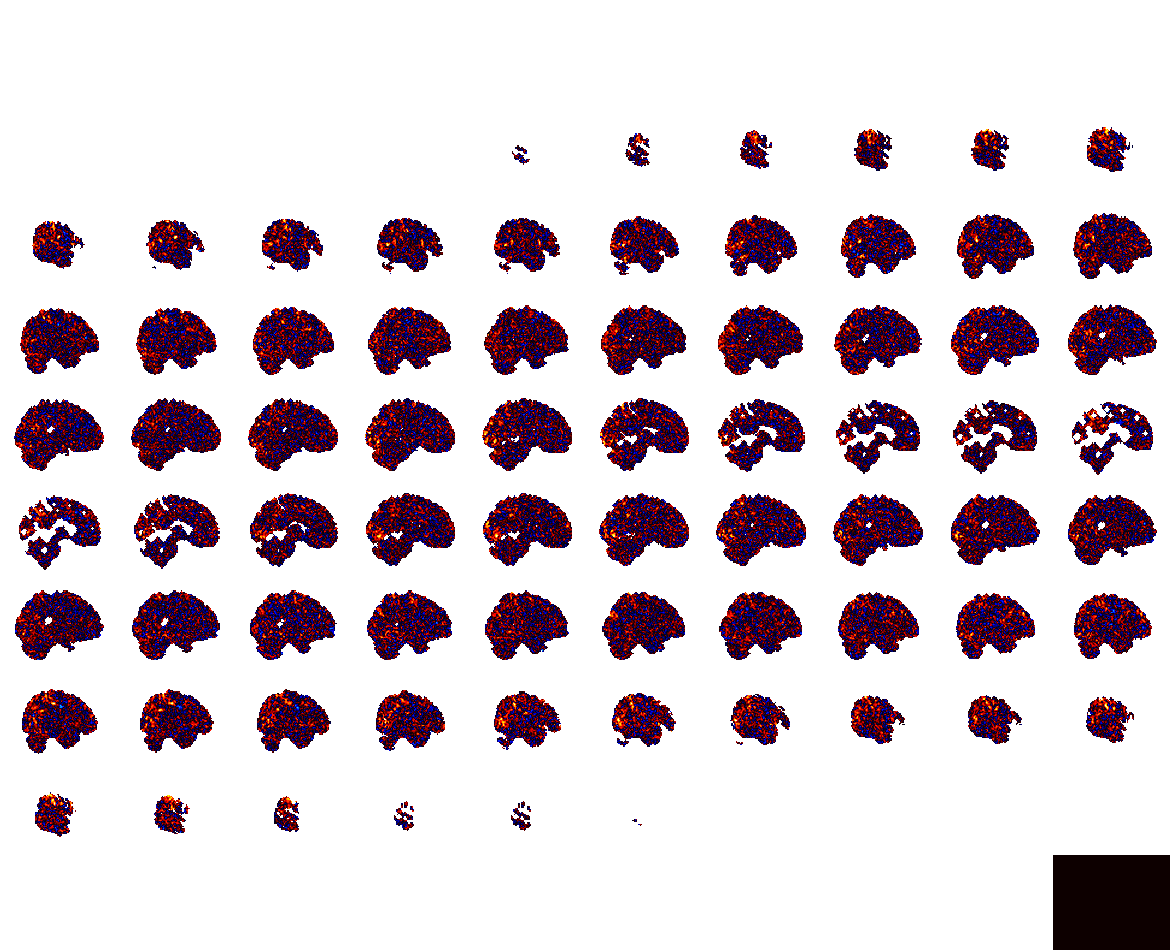

In [19]:
from nilearn.plotting import view_img

view_img(r,  title="ISC", dim=-1)

In [23]:
np.zeros((200,380,124045))

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.